In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비

In [538]:
import tensorflow as tf

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [539]:
print(train_x.shape)
print(test_x.shape)

(60000, 28, 28)
(10000, 28, 28)


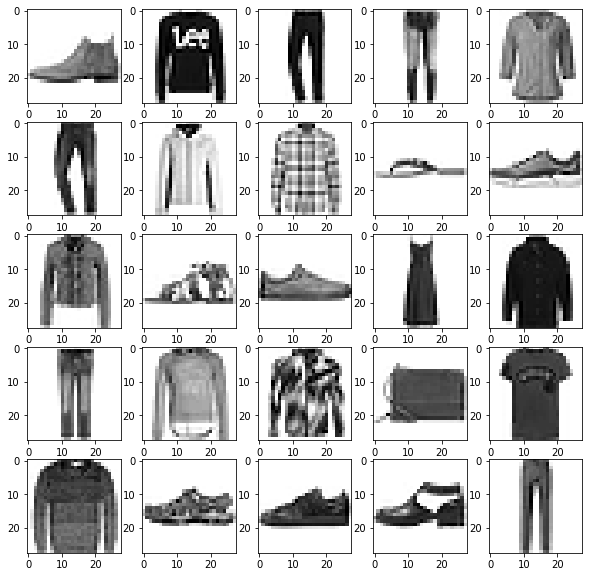

In [540]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_x[i], cmap="binary")

plt.show()

# Test 데이터 생성

In [541]:
# load_data()로 받은 것은 read only이다 카피해서 write가능하게 한다.
test_x = test_x.copy()
test_y = np.zeros_like(test_y)

In [542]:
def draw_scar(image, size=2):
    x = np.random.randint(0+size, 27-size)
    y = np.random.randint(0+size, 27-size)
    image[y-size:y+size+1,x] = 255
    image[y,x-size:x+size+1] = 255

# 반절을 낙서를 그린다.
for i in range(int(len(test_x)/2)):    
    draw_scar(test_x[i], size=1)
    test_y[i] = 1

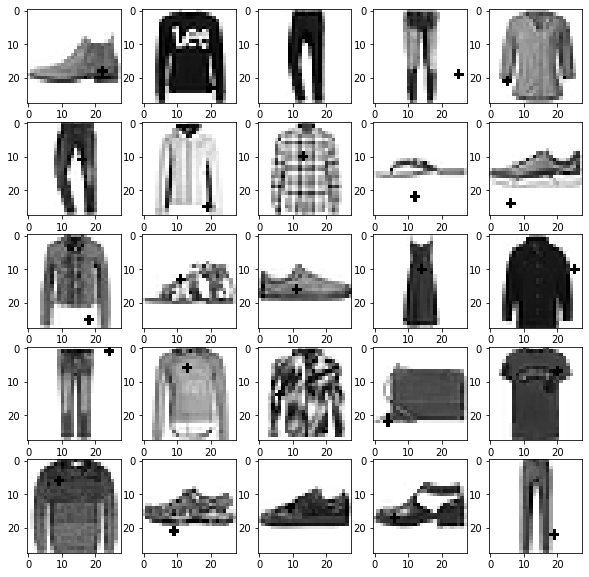

In [543]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_x[i], cmap="binary")

plt.show()

# Normalize

In [544]:
train_x = train_x / 255.
test_x = test_x / 255.

In [545]:
train_x = np.reshape(train_x, (-1, 28, 28, 1))
test_x = np.reshape(test_x, (-1, 28, 28, 1))

# 모델 학습

In [546]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [547]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

model = Sequential()

model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Dense(2))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(1, (3, 3), activation="sigmoid", padding="same"))



model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=["mape"])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  
hist = model.fit(train_x, train_x, epochs=1000, batch_size=1024, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/1000
53/53 [==============================] - 5s 48ms/step - loss: 0.4934 - mape: 99631792.0000 - val_loss: 0.3730 - val_mape: 18796304.0000
Epoch 2/1000
53/53 [==============================] - 2s 44ms/step - loss: 0.3499 - mape: 26425858.0000 - val_loss: 0.3344 - val_mape: 30996720.0000
Epoch 3/1000
53/53 [==============================] - 2s 44ms/step - loss: 0.3191 - mape: 19099880.0000 - val_loss: 0.3142 - val_mape: 9992366.0000
Epoch 4/1000
53/53 [==============================] - 2s 43ms/step - loss: 0.3062 - mape: 14960645.0000 - val_loss: 0.3347 - val_mape: 28473458.0000
Epoch 5/1000
53/53 [==============================] - 2s 43ms/step - loss: 0.2971 - mape: 12772235.0000 - val_loss: 0.3021 - val_mape: 7622666.0000
Epoch 6/1000
53/53 [==============================] - 2s 43ms/step - loss: 0.2910 - mape: 10852307.0000 - val_loss: 0.2876 - val_mape: 13329054.0000
Epoch 7/1000
53/53 [==============================] - 2s 43ms/step - loss: 0.2862 - mape: 9688834.0000 - val

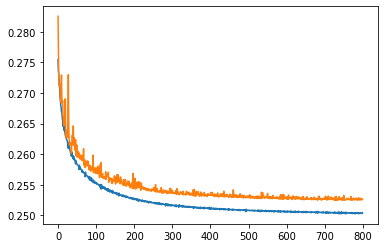

In [548]:
plt.plot(hist.history['loss'][10:])
plt.plot(hist.history['val_loss'][10:])
plt.show()

# threshold 구하기

In [549]:
reconstructed = model.predict(train_x)

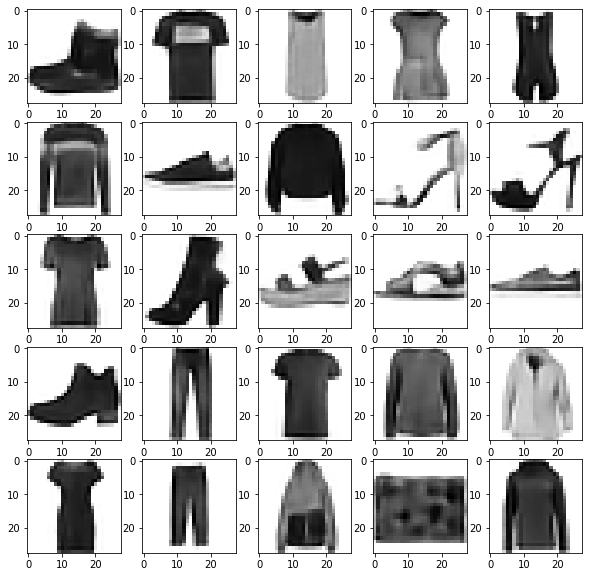

In [550]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(reconstructed[i].reshape((28,28)), cmap="binary")

plt.show()

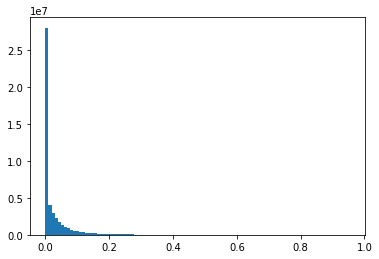

In [551]:
diff = np.abs(reconstructed - train_x)
plt.hist(diff.flatten(), bins=100)
plt.show()

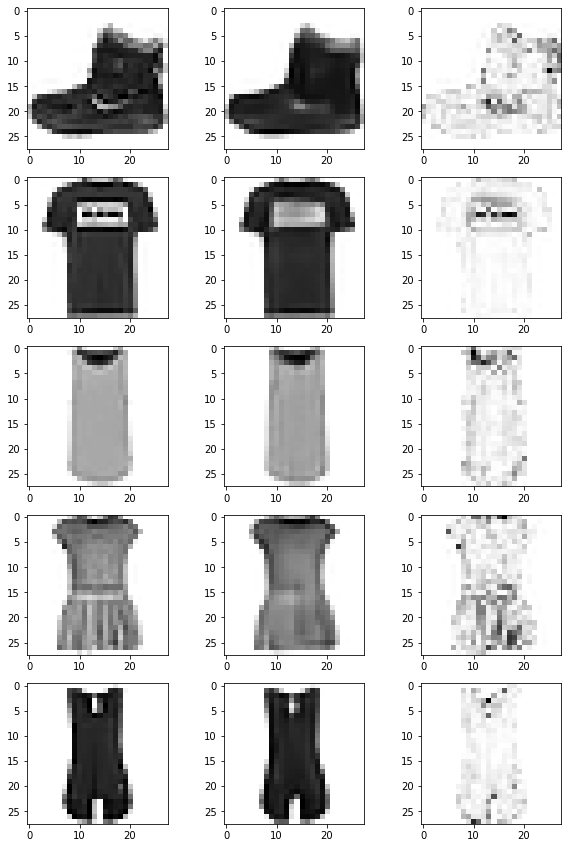

In [552]:
plt.figure(figsize=(10,15))
for i in range(5):
    plt.subplot(5,3,i*3+1)
    plt.imshow(train_x[i].reshape((28,28)), cmap="binary")
    plt.subplot(5,3,i*3+2)
    plt.imshow(reconstructed[i].reshape((28,28)), cmap="binary")
    plt.subplot(5,3,i*3+3)
    plt.imshow(diff[i].reshape((28,28)), cmap="binary")

plt.show()

In [553]:
sorted_diff = np.sort(diff.flatten())
threshold_index = int(len(sorted_diff)*0.999)
threshold = sorted_diff[threshold_index]

print(threshold)

0.4629009309936972


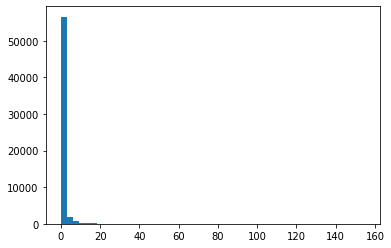

In [554]:
lage_diff_count = (diff>threshold).sum(axis=(1,2,3))
plt.hist(lage_diff_count, bins=50)
plt.show()

# 탐지 실행

In [555]:
reconstructed = model.predict(test_x)

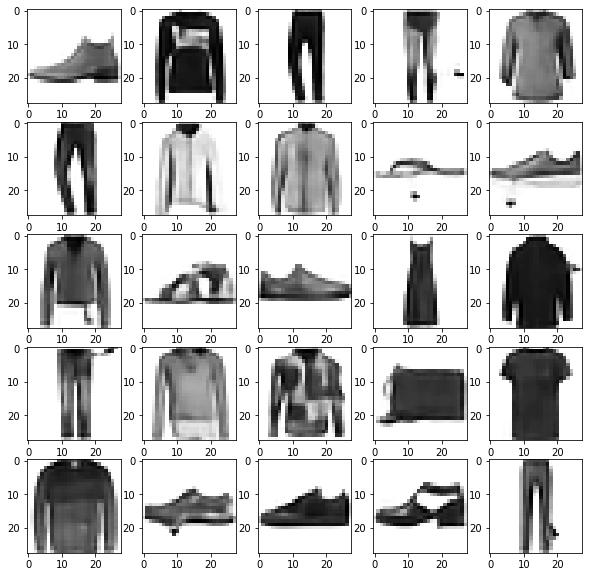

In [556]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(reconstructed[i].reshape((28,28)), cmap="binary")

plt.show()

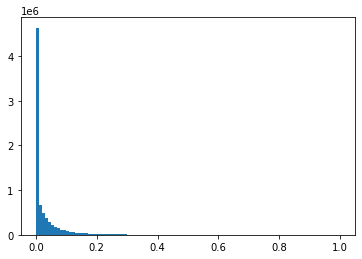

In [557]:
diff = np.abs(reconstructed - test_x)
plt.hist(diff.flatten(), bins=100)
plt.show()

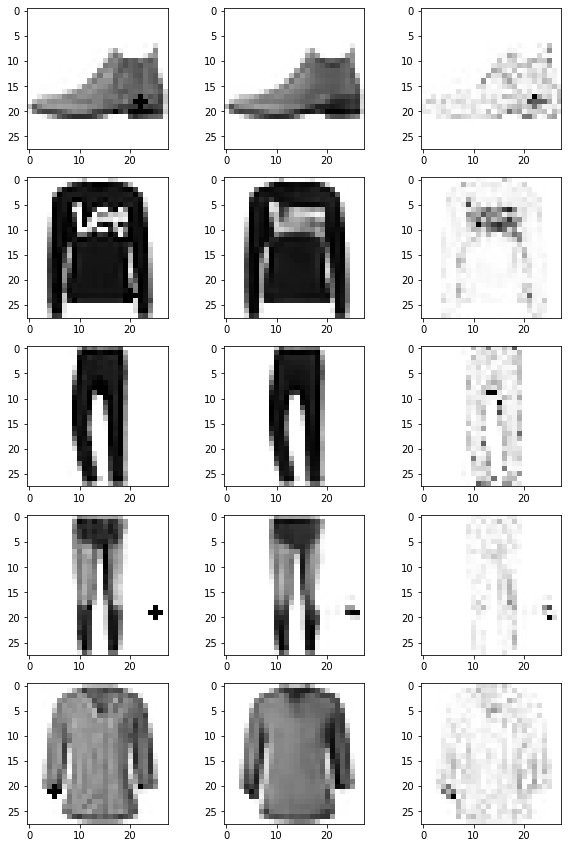

In [558]:
plt.figure(figsize=(10,15))
for i in range(5):
    plt.subplot(5,3,i*3+1)
    plt.imshow(test_x[i].reshape((28,28)), cmap="binary")
    plt.subplot(5,3,i*3+2)
    plt.imshow(reconstructed[i].reshape((28,28)), cmap="binary")
    plt.subplot(5,3,i*3+3)
    plt.imshow(diff[i].reshape((28,28)), cmap="binary")

plt.show()

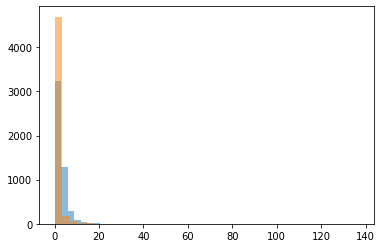

In [559]:
lage_diff_count = (diff>threshold).sum(axis=(1,2,3))

half_index = int(len(test_x)*0.5)
plt.hist(lage_diff_count[:half_index], bins=40, alpha=0.5)
plt.hist(lage_diff_count[half_index:], bins=40, alpha=0.5)
plt.show()



In [560]:
predicted = (lage_diff_count>0).astype(np.int16)

n = len(test_x)
accuracy = (predicted == test_y).sum() / n

print("accuracy=", accuracy)

accuracy= 0.7196
